In [1]:
import sys

sys.path.insert(0, "../simulation")
sys.path.insert(0, "../methods")

import numpy as np
from VAMPClass import VAMP
from AnalyticalMappingEntropyClass import AME
from SimulationClass import Simulation
from TicaTimescalesClass import TICA
from _methods_utils import _mapping_combinations
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

%matplotlib inline

# from importlib import reload

In [2]:
kirchoff_matrix = np.load('2erl-10A-kirchoff-matrix.npy')
n_atoms = len(kirchoff_matrix)
# simulation = Simulation(kirchoff_matrix, save_frequency = 5000)
# simulation.run_simulation(10000000)

In [3]:
n_beads = 4
lagtime = 1000

ame = AME(kirchoff_matrix, n_beads = n_beads)
ame.compute_ame()
ame_results = ame.return_ame_scores()
vp_results = ame.return_vp_scores()

vamp = VAMP(kirchoff_matrix, n_beads = n_beads)
vamp.compute_vamp(lagtime)
vamp_results, _ = vamp.return_vamp_scores()

In [10]:
ame.return_optimal_ame_score(), ame.return_optimal_vp_score(), vamp.return_optimal_vamp_score()

(((5, 6, 14, 27), -78.45482496621878),
 ((0, 21, 38, 39), 0.14065327015817664),
 ((17, 21, 38, 39), 0.046638943830077315))

In [11]:
all_atom_tica = TICA(
    kirchoff_matrix = kirchoff_matrix,
    n_beads = n_atoms,
)

all_atom_mapping_matrix = np.eye(n_atoms)
all_atom_tica.compute_timescale_modes(all_atom_mapping_matrix, lagtime)
all_atom_timescales = all_atom_tica.return_timescales()

In [12]:
# mapping_matrices = _mapping_combinations(n_atoms, n_beads)
vamp_tica = TICA(
    kirchoff_matrix = kirchoff_matrix,
    n_beads = n_beads
)
mapping_matrix = np.zeros((n_beads,n_atoms))
for ii,ind in enumerate(vamp.return_optimal_vamp_score()[0]):
    mapping_matrix[ii,ind] = 1
    
vamp_tica.compute_timescale_modes(mapping_matrix, lagtime)
vamp_timescales = vamp_tica.return_timescales()

In [13]:
ame_tica = TICA(
    kirchoff_matrix = kirchoff_matrix,
    n_beads = n_beads
)
mapping_matrix = np.zeros((n_beads,n_atoms))
for ii,ind in enumerate(ame.return_optimal_ame_score()[0]):
    mapping_matrix[ii,ind] = 1

ame_tica.compute_timescale_modes(mapping_matrix, lagtime)
ame_timescales = ame_tica.return_timescales()

In [14]:
mapping_matrices = _mapping_combinations(n_atoms, n_beads)
vp_tica = TICA(
    kirchoff_matrix = kirchoff_matrix,
    n_beads = n_beads
)
mapping_matrix = np.zeros((n_beads,n_atoms))
for ii,ind in enumerate(ame.return_optimal_vp_score()[0]):
    mapping_matrix[ii,ind] = 1

vp_tica.compute_timescale_modes(mapping_matrix, lagtime)
vp_timescales = vp_tica.return_timescales()

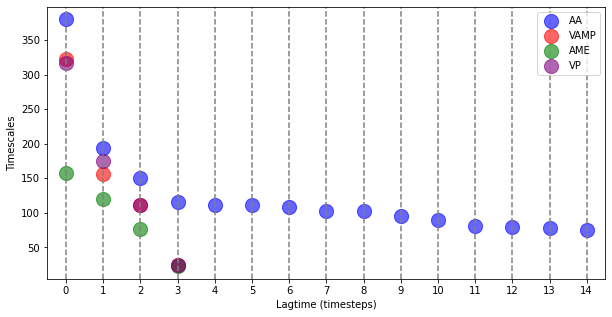

In [15]:
fig,ax = plt.subplots(figsize=(10,5))
xvis = 15
#
x = np.arange(0,len(all_atom_timescales))
ax.scatter(x, all_atom_timescales, s=200, color='blue', alpha=0.6, label='AA')
#
x = np.arange(0,len(vamp_timescales))
ax.scatter(x, vamp_timescales, s=200, color='red', alpha=0.6, label='VAMP')
ax.scatter(x, ame_timescales, s=200, color='green', alpha=0.6, label='AME')
ax.scatter(x, vp_timescales, s=200, color='purple', alpha=0.6, label='VP')
#
for ix in range(xvis):
    ax.axvline(ix,color='gray',linestyle='--')

ax.set_xticks(range(xvis))
ax.set_ylabel('Timescales')
ax.set_xlabel('Lagtime (timesteps)')
ax.set_xlim(-0.5,xvis-0.5)
ax.legend(loc='upper right')
fig.savefig('tica-timescale-2erl.png',dpi=300)